# Multi linear model

Single shot multi linear model

In [1]:
import time

import pandas as pd
import tensorflow as tf

import utils

## Dataset

In [2]:
case_1 = pd.read_csv("./datasets/case_1.csv", index_col='Time')
case_2 = pd.read_csv("./datasets/case_2.csv", index_col='Time')
case_3 = pd.read_csv("./datasets/case_3.csv", index_col='Time')
case_4 = pd.read_csv("./datasets/case_4.csv", index_col='Time')
case_5 = pd.read_csv("./datasets/case_5.csv", index_col='Time')

In [3]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets[1:]

In [4]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

In [5]:
PLOT_COL = "outlet_65"

## Model creation

In [6]:
IN_WIDTH = 18
OUT_STEPS = 18
MAX_EPOCHS = 30
features_size = len(label_columns)

print(f"Using {IN_WIDTH*5//60}min {IN_WIDTH*5 % 60}s of data to predict {OUT_STEPS*5//60}min {IN_WIDTH*5 % 60}s into de future.")

Using 1min 30s of data to predict 1min 30s into de future.


In [7]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.015), activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.015), activation='relu'),
    tf.keras.layers.Dropout(0.3),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*features_size,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, features_size])
])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-10-20 19:48:43.812024: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-20 19:48:43.812129: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
multi_dense_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

In [9]:
exec_times = {}

In [10]:
results = {}

## Case 2

In [11]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_2,
    model=multi_dense_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_2'] = time.time() - start_t

2022-10-20 19:48:44.421257: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-20 19:48:44.986046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-20 19:48:45.656635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [12]:
multi_dense_model.build(input_shape=window.example[0].shape)
print(multi_dense_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 272)            0         
                                                                 
 dropout (Dropout)           (None, 1, 272)            0         
                                                                 
 dense (Dense)               (None, 1, 10)             2730      
                                                                 
 dropout_1 (Dropout)         (None, 1, 10)             0         
                                                                 
 dense_1 (Dense)             (None, 1, 10)             110       
                                                                 
 dropout_2 (Dropout)         (None, 1, 10)             0         
                                                                 
 dense_2 (Dense)             (None, 1, 2430)           2

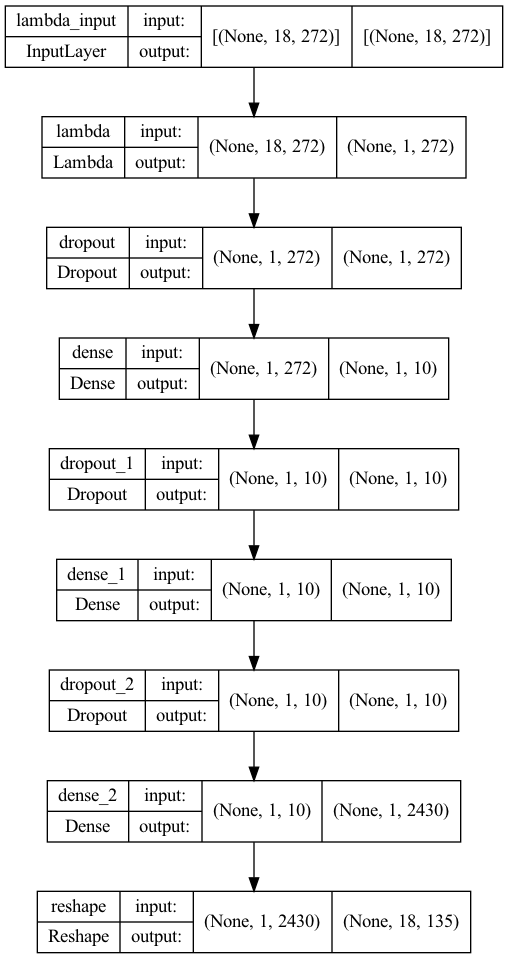

In [13]:
tf.keras.utils.plot_model(multi_dense_model, "./plots/models/multi_dense.png", show_shapes=True)

label_col_index 64
label_col_index 64


2022-10-20 19:48:58.767996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


label_col_index 64


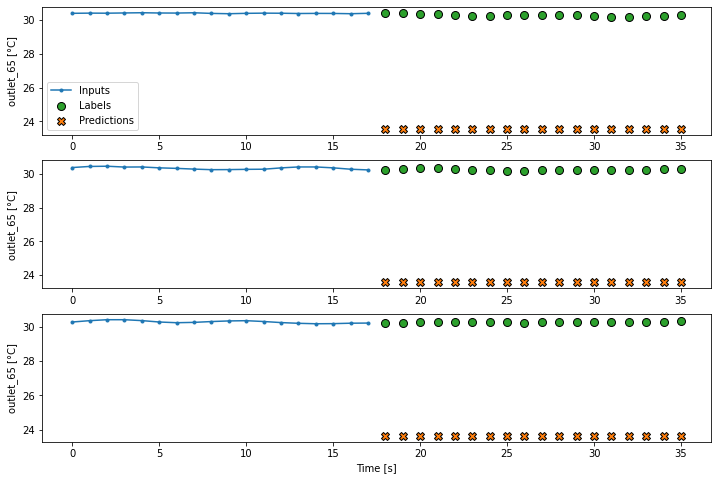

In [14]:
window.plot(multi_dense_model, plot_col=PLOT_COL)

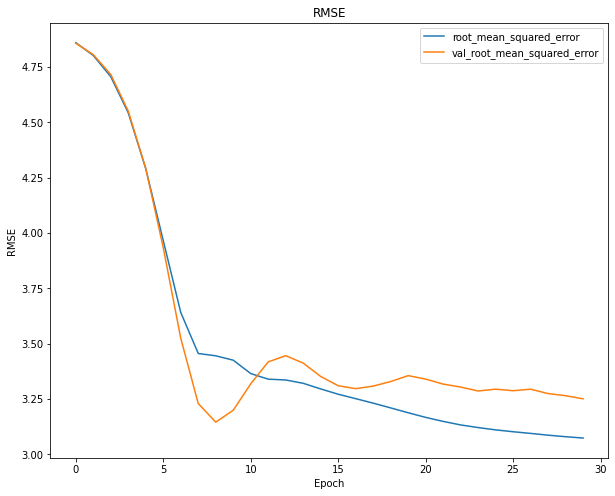

In [15]:
utils.plot_losses(history=history)

In [16]:
results['case_2'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 3

In [17]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_3,
    model=multi_dense_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_3'] = time.time() - start_t

label_col_index 64
label_col_index 64
label_col_index 64


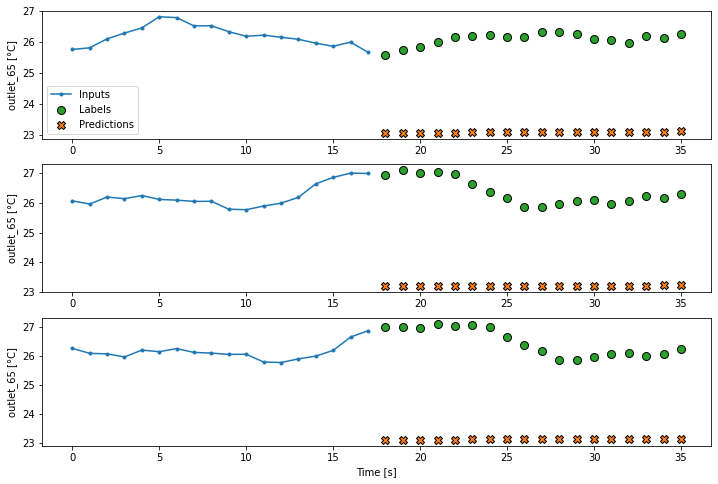

In [18]:
window.plot(multi_dense_model, plot_col=PLOT_COL)

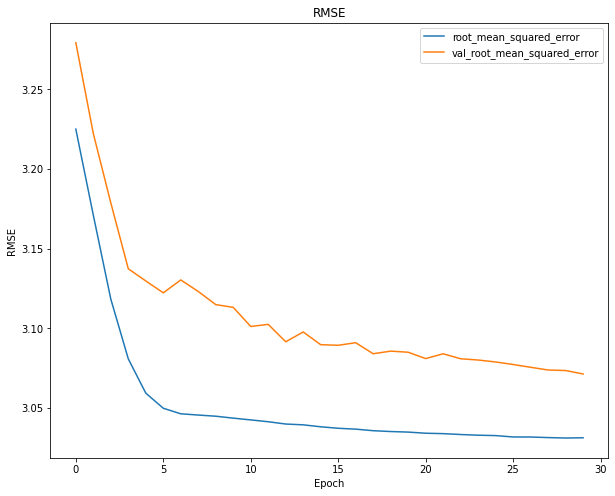

In [19]:
utils.plot_losses(history=history)

In [20]:
results['case_3'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 4

In [21]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_4,
    model=multi_dense_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)
exec_times['case_4'] = time.time() - start_t

label_col_index 64
label_col_index 64
label_col_index 64


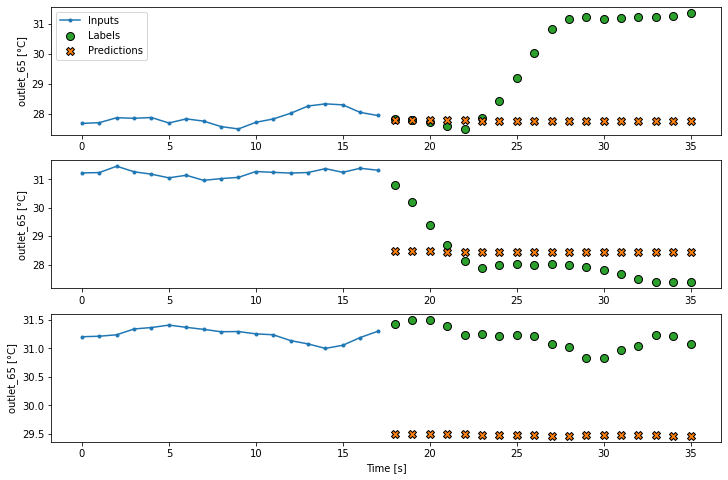

In [22]:
window.plot(multi_dense_model, plot_col=PLOT_COL)

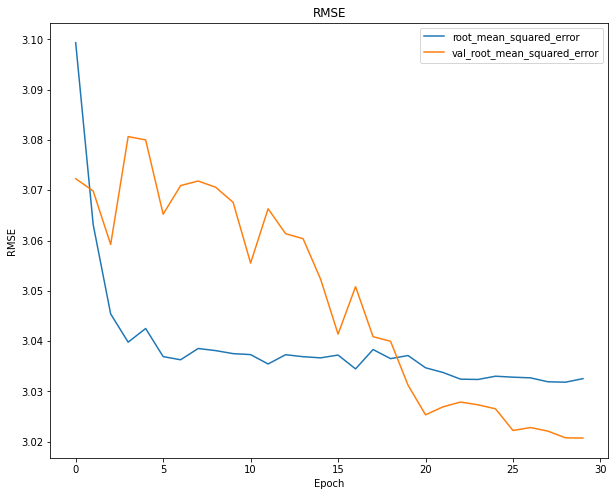

In [23]:
utils.plot_losses(history=history)

In [24]:
results['case_4'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 5

In [25]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_5,
    model=multi_dense_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

exec_times['case_5'] = time.time() - start_t

label_col_index 64
label_col_index 64
label_col_index 64


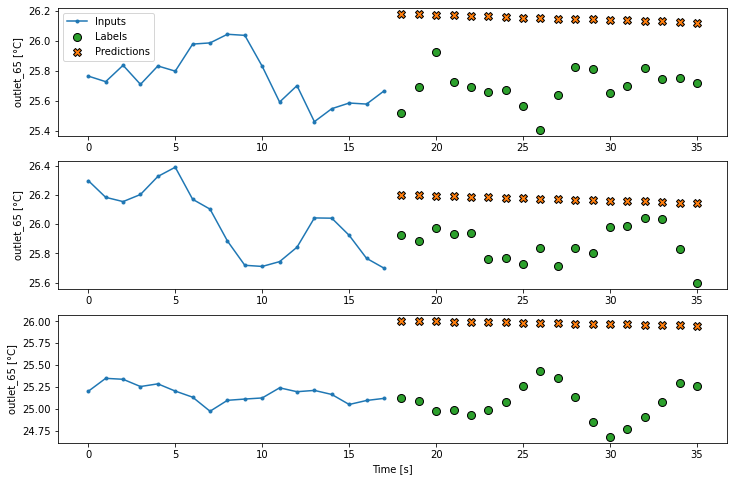

In [26]:
window.plot(multi_dense_model, plot_col=PLOT_COL)

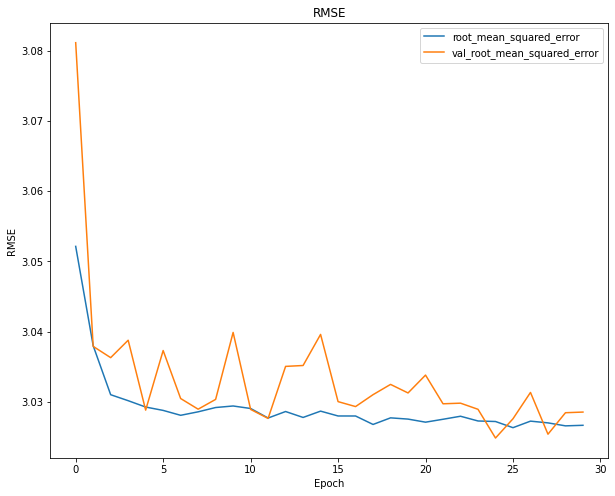

In [27]:
utils.plot_losses(history=history)

In [28]:
results['case_5'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 1 (Testing)

In [29]:
window = utils.WindowGenerator(
    train_df=case_1,
    input_width=IN_WIDTH,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    label_columns=label_columns
)

test_results = multi_dense_model.evaluate(window.train)

5/5 [==============================] - 0s 11ms/step - loss: 0.0334 - root_mean_squared_error: 0.1877


## Results

label_col_index 64
label_col_index 64
label_col_index 64


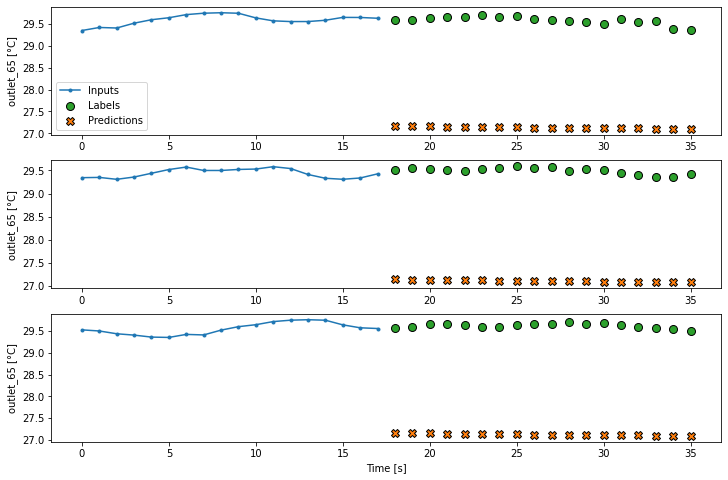

In [30]:
window.plot(
    multi_dense_model,
    plot_col=PLOT_COL,
    filename="./plots/predictions/multi_dense.jpg"
)

In [31]:
results['test'] = {
    'loss': utils.inverse_transform(test_results[0]),
    'rmse': utils.inverse_transform_rmse(test_results[1])
}

In [39]:
results_df = pd.DataFrame(results).transpose().round(2)
print(results_df.style.format(precision=2).to_latex())

results_df.to_pickle("./results/metrics/multi_dense.pkl")

\begin{tabular}{lrrrr}
 & loss & rmse & val_loss & val_rmse \\
case_2 & 12.97 & 3.07 & 13.82 & 3.25 \\
case_3 & 10.54 & 3.03 & 10.72 & 3.07 \\
case_4 & 9.63 & 3.03 & 9.56 & 3.02 \\
case_5 & 9.26 & 3.03 & 9.26 & 3.03 \\
test & 9.88 & 3.15 & nan & nan \\
\end{tabular}



In [40]:
exec_times_df = pd.DataFrame().from_dict(exec_times, orient='index', columns=['Time']).round(2)
print(exec_times_df.style.format(precision=2).to_latex())

exec_times_df.to_pickle("./results/exectimes/multi_dense.pkl")

\begin{tabular}{lr}
 & Time \\
case_2 & 13.97 \\
case_3 & 13.05 \\
case_4 & 14.71 \\
case_5 & 17.95 \\
\end{tabular}



In [34]:
total_t = exec_times_df['Time'].sum()
print("Total training time: %dmin %.2fs" % (total_t//60, total_t % 60))

Total training time: 0min 59.69s


## Export model

In [36]:
multi_dense_model.save("./models/multi_dense")

2022-10-20 20:45:52.245972: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./models/multi_dense/assets
